In [32]:
import pandas as pd
data = pd.read_csv("UNSW_NB15_set.csv")
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [33]:
print(data.shape)
data['attack_cat'].unique()

(82332, 45)


array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [35]:
data.drop('id', axis = 1, inplace = True)

In [36]:
data.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [37]:
data.replace('-', pd.NA, inplace=True)

# Fill missing values using the mode for categorical columns ('service' in this case)
data['service'].fillna(data['service'].mode().iloc[0], inplace=True)

In [38]:
data.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,dns,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,dns,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,dns,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,dns,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,dns,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [39]:
data.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label      

In [40]:
duplicate_rows = data[data.duplicated()]
# Print duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
             dur proto service state  spkts  dpkts  sbytes  dbytes  \
10      0.000000   arp     dns   INT      1      0      46       0   
11      0.000000   arp     dns   INT      1      0      46       0   
39     59.995674   arp     dns   INT      2      0      92       0   
41     59.995678   arp     dns   INT      2      0      92       0   
53     14.846565   tcp     dns   REQ     22      0     990       0   
...          ...   ...     ...   ...    ...    ...     ...     ...   
82325   0.000010   udp     dns   INT      2      0     104       0   
82326   0.000009   udp     dns   INT      2      0     104       0   
82329   0.000000   arp     dns   INT      1      0      46       0   
82330   0.000000   arp     dns   INT      1      0      46       0   
82331   0.000009   udp     dns   INT      2      0     104       0   

                rate  sttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  \
10          0.000000     0  ...                 2               2   
11   

In [41]:
import pandas as pd
# Remove duplicate rows
data= data.drop_duplicates()

# Print the DataFrame after removing duplicates
print("After removing duplicates")
print(data)

After removing duplicates
            dur proto service state  spkts  dpkts  sbytes  dbytes  \
0      0.000011   udp     dns   INT      2      0     496       0   
1      0.000008   udp     dns   INT      2      0    1762       0   
2      0.000005   udp     dns   INT      2      0    1068       0   
3      0.000006   udp     dns   INT      2      0     900       0   
4      0.000010   udp     dns   INT      2      0    2126       0   
...         ...   ...     ...   ...    ...    ...     ...     ...   
82319  0.811914   tcp     dns   FIN     10      6     588     268   
82322  0.000004   udp     dns   INT      2      0     104       0   
82323  5.167410   tcp     dns   FIN    108     24  138067    1042   
82327  0.000005   udp     dns   INT      2      0     104       0   
82328  1.106101   tcp     dns   FIN     20      8   18062     354   

                rate  sttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  \
0       90909.090200   254  ...                 1               2   
1      

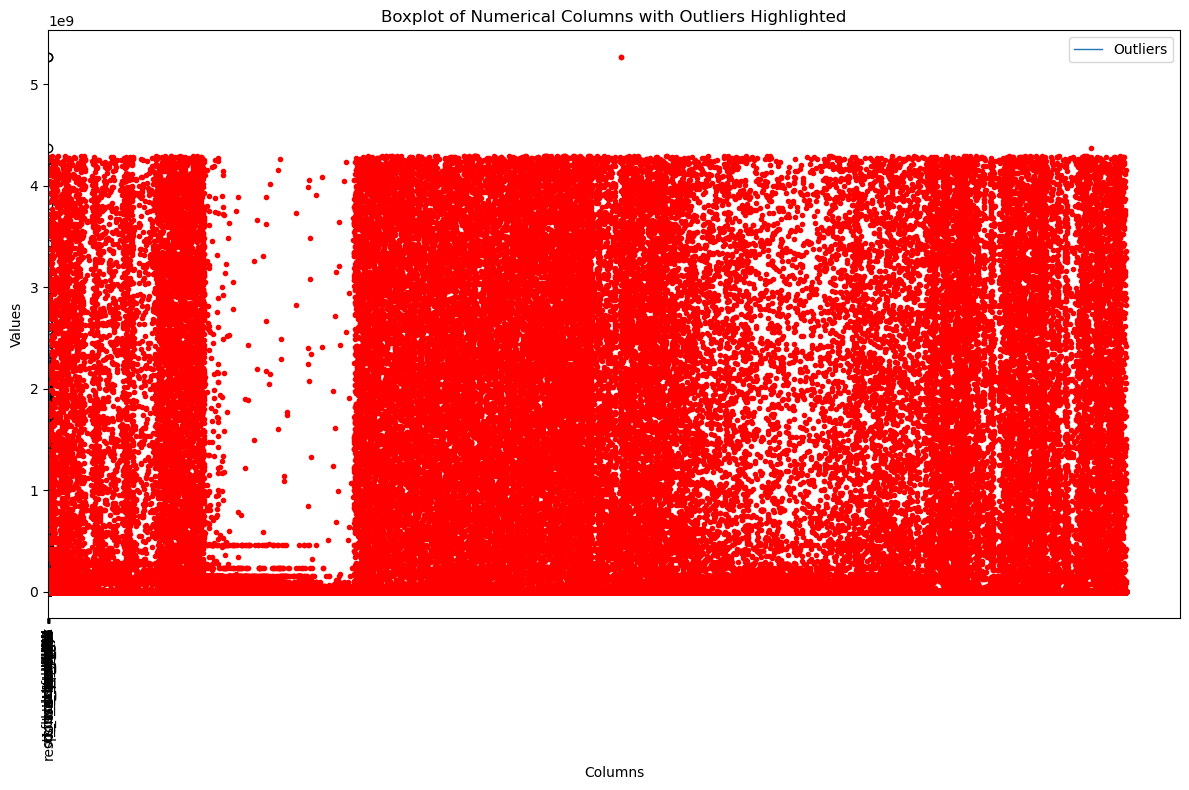

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the dataset
# data = pd.read_csv('your_dataset.csv')

# Define a function to detect outliers using IQR method
def detect_outliers_iqr(df, threshold=1.5):
    outliers = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
            outliers.extend(outlier_indices)
    return list(set(outliers))

# Detect outliers in the dataset
outlier_indices = detect_outliers_iqr(data)

# Create a boxplot to visualize outliers for each numerical column
plt.figure(figsize=(12, 8))
data.boxplot(rot=90)
plt.title('Boxplot of Numerical Columns with Outliers Highlighted')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.grid(False)

# Highlight outliers in red
for col in data.columns:
    if pd.api.types.is_numeric_dtype(data[col]):
        plt.plot([], [], 'ro', markersize=3, label='Outliers')  # Empty plot for legend
        plt.plot(data.loc[outlier_indices].index, data.loc[outlier_indices][col], 'ro', markersize=3)

plt.legend(['Outliers'], loc='upper right')
plt.tight_layout()
plt.show()


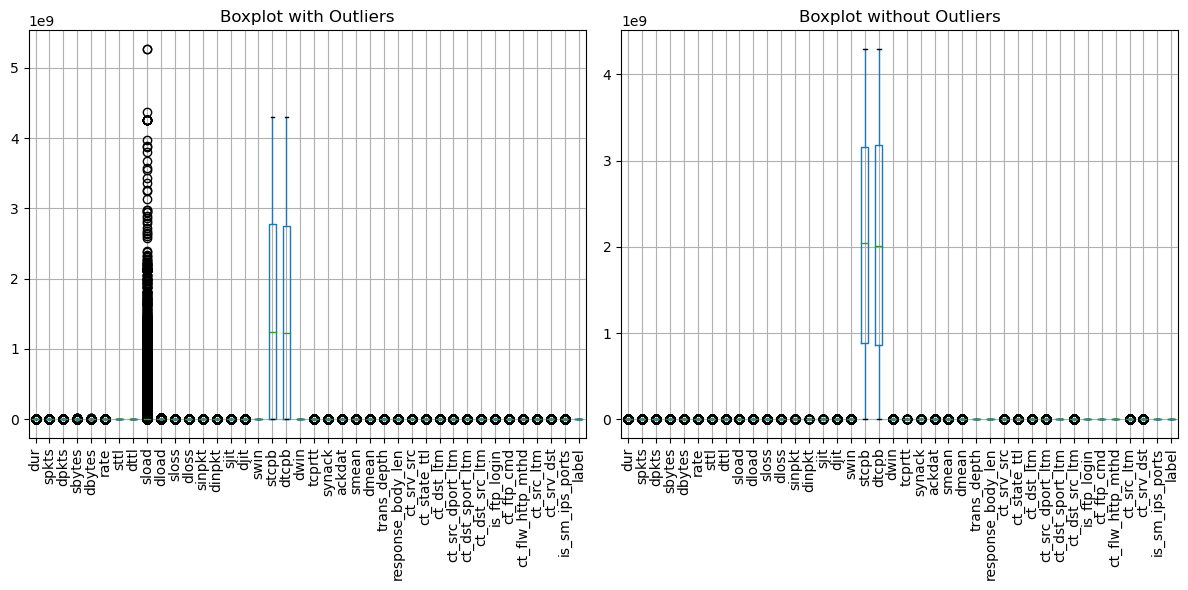

DataFrame without outliers:
            dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
36     0.714182   tcp     dns   FIN     10      6     534     268  21.003049   
42     0.757295   tcp     dns   FIN     10      6     534     268  19.807340   
43     0.759306   tcp     dns   FIN     10      8     534     354  22.388865   
46     0.624048   tcp     dns   FIN     10      6     534     268  24.036613   
50     0.655618   tcp     dns   FIN     10      6     534     268  22.879176   
...         ...   ...     ...   ...    ...    ...     ...     ...        ...   
82311  0.888738   tcp     dns   FIN     10      6     588     268  16.877865   
82312  1.173606   tcp     dns   FIN     10      8     588     354  14.485270   
82314  0.524434   tcp     dns   FIN     10      6     588     268  28.602266   
82317  0.947039   tcp     dns   FIN     10      6     588     268  15.838841   
82319  0.811914   tcp     dns   FIN     10      6     588     268  18.474862   

       sttl

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the dataset
# data = pd.read_csv('your_dataset.csv')

# Define a function to detect outliers using IQR method
def detect_outliers_iqr(df, threshold=1.5):
    outliers = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
            outliers.extend(outlier_indices)
    return list(set(outliers))

# Detect outliers in the dataset
outlier_indices = detect_outliers_iqr(data)

# Remove outliers from the dataset
data_no_outliers = data.drop(outlier_indices)

# Create boxplot before removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data.boxplot(rot=90)
plt.title('Boxplot with Outliers')

# Create boxplot after removing outliers
plt.subplot(1, 2, 2)
data_no_outliers.boxplot(rot=90)
plt.title('Boxplot without Outliers')

plt.tight_layout()
plt.show()

# Print the DataFrame after removing outliers
print("DataFrame without outliers:")
print(data_no_outliers)


In [45]:
# Assuming 'data_no_outliers' is your DataFrame without outliers

# Save the DataFrame without outliers to a CSV file
data_no_outliers.to_csv('UNSW_NB15_no_outliers.csv', index=False)

print("Dataset without outliers has been saved to 'UNSW_NB15_no_outliers.csv'.")


Dataset without outliers has been saved to 'UNSW_NB15_no_outliers.csv'.
